In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [48]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [50]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


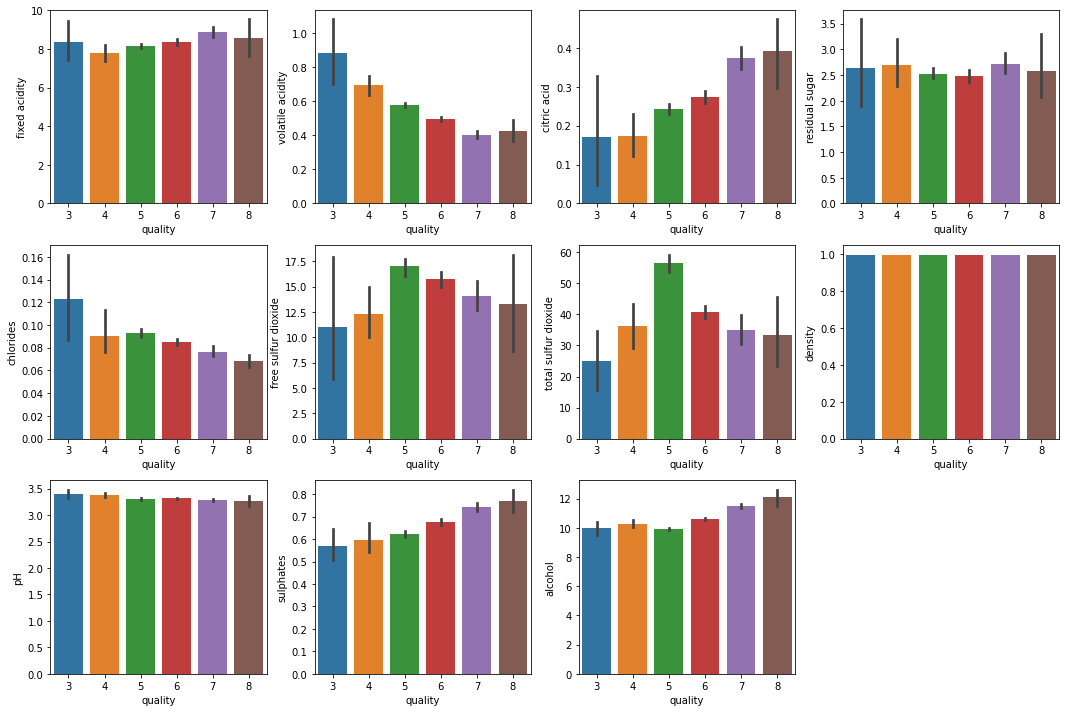

In [51]:
#Ploting data
fig = plt.figure(figsize=(15,10))

plt.subplot(3, 4, 1)
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)


plt.subplot(3, 4, 2)
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

plt.subplot(3, 4, 3)
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

plt.subplot(3, 4, 4)
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

plt.subplot(3, 4, 5)
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

plt.subplot(3, 4, 6)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

plt.subplot(3, 4, 7)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

plt.subplot(3, 4, 8)
sns.barplot(x = 'quality', y = 'density', data = wine)

plt.subplot(3, 4, 9)
sns.barplot(x = 'quality', y = 'pH', data = wine)

plt.subplot(3, 4, 10)
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

plt.subplot(3, 4, 11)
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

plt.tight_layout()

In [52]:
# Prebrojimo koliko instanci svake klase ima
wine['quality'].value_counts()
#Imamo 6 klasa kvaliteta(3,4,5,6,7,8)
#Sve klase [3..6] oznacavamo kao lose
#Sve klase 7 i 8 oznacavamo kao dobre

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [53]:
ranges = (2,6.5,8)
groups = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = ranges, labels = groups)
#Ovde smo sa pd.cut() podelili u dve kategorije [2-6.5] i (6.5-8]

In [54]:
#Bad -> 0
#Good -> 1
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [55]:
#Ponovo prebrojimo instance da proverimo da li je sve okej
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [56]:
good_quality = wine[wine['quality'] == 1]
bad_quality = wine[wine['quality'] == 0]

bad_quality = bad_quality.sample(frac = 1)
bad_quality = bad_quality[:217]

new_df = pd.concat([good_quality, bad_quality])
new_df = new_df.sample(frac = 1)

new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1507,7.5,0.380,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,0
1067,11.1,0.310,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,1
1162,8.5,0.320,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8,1
1398,7.0,0.600,0.12,2.2,0.083,13.0,28.0,0.99660,3.52,0.62,10.2,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
335,11.9,0.695,0.53,3.4,0.128,7.0,21.0,0.99920,3.17,0.84,12.2,1
423,10.5,0.240,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0,1
931,7.4,0.610,0.01,2.0,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,0
1147,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,1


In [57]:
new_df['quality'].value_counts()

0    217
1    217
Name: quality, dtype: int64

In [58]:
new_df.corr()['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.575351
sulphates               0.365923
citric acid             0.325249
fixed acidity           0.131814
residual sugar          0.010494
free sulfur dioxide    -0.064186
pH                     -0.069744
total sulfur dioxide   -0.199953
chlorides              -0.214990
density                -0.275626
volatile acidity       -0.441269
Name: quality, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X = new_df.drop('quality', axis = 1)
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [60]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(), param, scoring = 'accuracy', cv = 10)
grid_rf.fit(X_train, y_train)

print('Best parameters -->', grid_rf.best_params_)


pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

print('\n')
print(accurancy_score(y_test, pred))


Best parameters --> {'n_estimators': 600}
[[57 10]
 [ 6 58]]


              precision    recall  f1-score   support

           0       0.90      0.85      0.88        67
           1       0.85      0.91      0.88        64

    accuracy                           0.88       131
   macro avg       0.88      0.88      0.88       131
weighted avg       0.88      0.88      0.88       131





NameError: name 'accurancy_score' is not defined